In [193]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [195]:
reeses = cv2.imread('../../DATA/reeses_puffs.png',0)

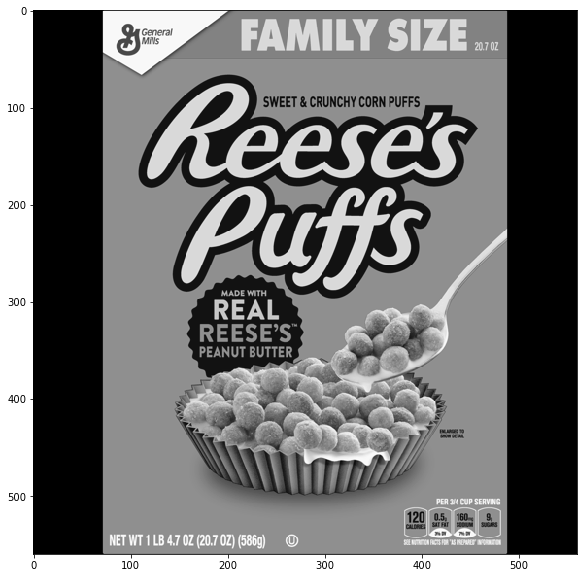

In [196]:
display(reeses)

In [197]:
cereals = cv2.imread('../../DATA/many_cereals.jpg',0)

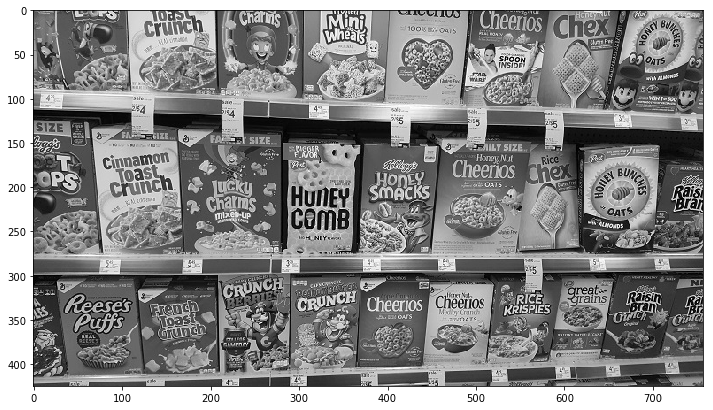

In [198]:
display(cereals)

In [111]:
orb = cv2.ORB_create()

In [113]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [114]:
#Brute Force MATCHING
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)


In [115]:
matches = bf.match(des1,des2)

In [116]:
single_matches = matches[0]
single_matches

<DMatch 00000191CB30AC30>

In [117]:
single_matches.distance

78.0

In [118]:
matches = sorted(matches,key=lambda x:x.distance)

In [119]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

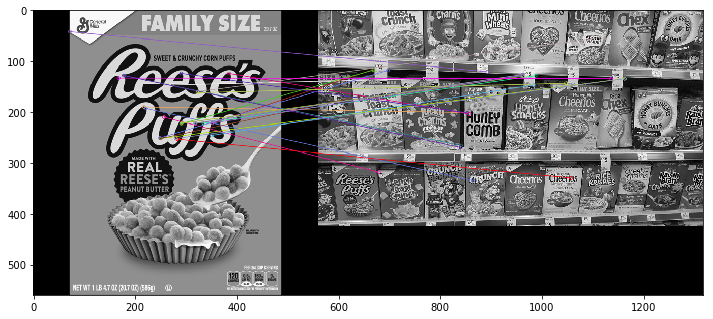

In [120]:
display(reeses_matches)

**SIFT DESCRIPTORS**

In [178]:
reeses = cv2.imread('../../DATA/reeses_puffs.png',0)
cereals = cv2.imread('../../DATA/many_cereals.jpg',0)

In [199]:
sift = cv2.xfeatures2d.SIFT_create()

In [200]:
#orb = cv2.ORB_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [126]:
bf = cv2.BFMatcher()

In [136]:
matches = bf.knnMatch(des1,des2,k=2)

In [64]:
# matches

In [157]:
good_matches = []
# LESS DISTANCE == BETTER MATCH

# RATIO MATCH1 < 75% OF MATCH 2
for match1,match2 in matches:
    #IF MATCH 1 DISTANCE is LESS THAN 75% od MATCH 2 DISTANCE
    #THEN DESCRIPTOR WAS A GOOD MATCH
    if match1.distance < 0.75*match2.distance:
        good_matches.append([match1])

In [158]:
len(good_matches)

78

In [159]:
len(matches)

1500

In [160]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good_matches,None,flags=2)

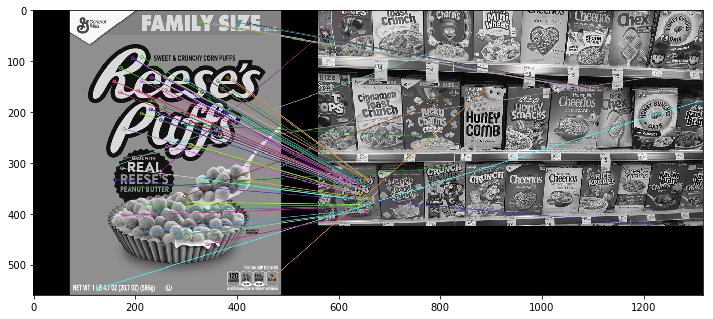

In [161]:
display(sift_matches)

**FLANN BASED MATCHER**


In [229]:
reeses = cv2.imread('../../DATA/reeses_puffs.png',0)
cereals = cv2.imread('../../DATA/many_cereals.jpg',0)

In [230]:
sift = cv2.xfeatures2d.SIFT_create()


In [231]:
#create the new set of objects
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [232]:
# FLANN (Fast Librery for Approximate Nearest Neighbors)
#create the descriptors flann
FALNN_INDEX_KDTREE = 0
index_params = dict(algorithm=FALNN_INDEX_KDTREE,trees=5)
search_params = dict(cheks=50)

In [233]:
#running flann parameters
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [234]:
#running the matches
matches = flann.knnMatch(des1,des2,k=2)

In [235]:
good = []
#NEW
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [236]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

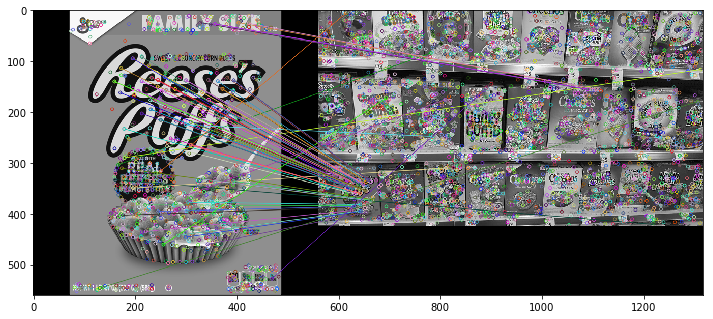

In [237]:
display(flann_matches)

**FLANN BASED MATCHER**   VERSION 2   
Give a blue color to matched features and red color to the single points whit flags iqual to zero.  
All we need is matches mask and a variable raw_params:

In [214]:
reeses = cv2.imread('../../DATA/reeses_puffs.png',0)
cereals = cv2.imread('../../DATA/many_cereals.jpg',0)

In [215]:
sift = cv2.xfeatures2d.SIFT_create()

In [216]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [217]:
FALNN_INDEX_KDTREE = 0
index_params = dict(algorithm=FALNN_INDEX_KDTREE,trees=5)
search_params = dict(cheks=50)

In [218]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [219]:
matches = flann.knnMatch(des1,des2,k=2)

In [220]:
### NEW ###
matchesMask = [[0,0] for i in range(len(matches))]

In [221]:
#NEW
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]

In [222]:
#NEW
draw_params = dict(matchColor=(0,0,255),
                   singlePointColor = (255,0,0),
                   matchesMask=matchesMask,
                   flags=0)

In [223]:
flann_matches2 = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

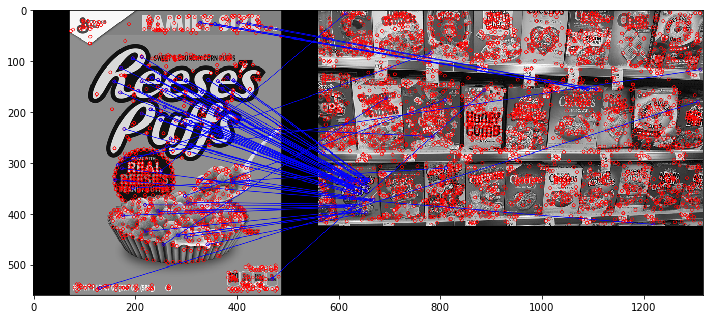

In [224]:
display(flann_matches2)